# Stationary distribution - Restricted Brownian motion (RBM) and Restricted Levy Flight (RLF)

In [1]:
# Libraries ----
import sys
import warnings
import numpy as np # type: ignore
import pandas as pd # type: ignore
import matplotlib.pyplot as plt # type: ignore
import matplotlib.ticker as mtick # type: ignore

from scipy.optimize import curve_fit # type: ignore

sys.path.append('../modules')
import misc_functions as mf # type: ignore
import eda_stochastic_process as edasp # type: ignore
import estimate_stochastic_process as esp # type: ignore

# Global options ----
warnings.filterwarnings("ignore")
pd.options.mode.chained_assignment = None
pd.set_option('display.max_columns', None)

## Global variables

In [2]:
input_path_raw = "../input_files/raw_data"
input_path_processed = "../input_files/processed_data"
input_path_data_dictionary = "../input_files/data_dictionary"
log_path = "../logs"
output_path = "../output_files"
input_generation_date = "2024-08-14"

In [3]:
def generate_arg_list(x0, t0, tf, n_steps, n_samples):
    args_list = pd.DataFrame(
        {
            "x0" : np.repeat(x0, n_samples),
            "t0" : np.repeat(t0, n_samples),
            "tf" : np.repeat(tf, n_samples),
            "n_steps" : np.repeat(n_steps, n_samples),
            "n_samples" : np.arange(1, n_samples + 1, 1)
        }
    )
    args_list = args_list.values.tolist()
    return args_list

## Brownian motion with threshold

In [4]:
mu_bm = 1 * 10**-1 # Stochastic drift
sigma_bm = 2 * 10**0 # Diffusion coefficient
threshold_bm = 0 * 10**-1 # Threshold value
x0_bm = 0 * 10**0 # Initial value
t0_bm = 0 * 10**0 # Initial time
tf_bm = 5 * 10**1 # Last time
n_steps_bm = 5 * 10 ** 3 + 1 # Number of steps per simulation
n_samples_bm = 4 * 10 ** 4 # Number of simulations

# Brownian motion arguments list sampling ----
rbm_args_list = generate_arg_list(x0 = x0_bm, t0 = t0_bm, tf = tf_bm, n_steps = n_steps_bm, n_samples = n_samples_bm)

In [5]:
# Simulate multiple of restricted Brownian motion paths
df_rbm = esp.simulate_brownian_motion(
    mu = mu_bm,
    sigma = sigma_bm,
    threshold = threshold_bm,
    threshold_flag = True,
    geometric_flag = False,
    bm_args_list = rbm_args_list,
    log_path = log_path,
    log_filename = "log_rbm",
    verbose = 1,
    tqdm_bar = True
)
df_rbm

100%|████████████████| 40000/40000 [01:15<00:00, 530.71it/s]


,simulation,restricted,time,value
0,1,True,0.00,0.000000
1,1,True,0.01,0.402363
2,1,True,0.02,0.353697
3,1,True,0.03,0.358782
4,1,True,0.04,0.516274
...,...,...,...,...
4996,40000,True,49.96,32.116646
4997,40000,True,49.97,32.106599
4998,40000,True,49.98,32.336779
4999,40000,True,49.99,32.281287


## Geometric Brownian motion with threshold

In [6]:
mu_gbm = 1.05 * 10**-2 # Stochastic drift
sigma_gbm = 1 * 10**-1 # Diffusion coefficient
threshold_gbm = 5 * 10**-1 # Threshold value
x0_gbm = 1 * 10**0 # Initial value
t0_gbm = 0 * 10**0 # Initial time
tf_gbm = 1 * 10**2 # Last time
n_steps_gbm = 5 * 10 ** 3 + 1 # Number of steps per simulation
n_samples_gbm = 4 * 10 ** 4 # Number of simulations

# Geometric Brownian motion arguments list sampling ----
rgbm_args_list = generate_arg_list(x0 = x0_gbm, t0 = t0_gbm, tf = tf_gbm, n_steps = n_steps_gbm, n_samples = n_samples_gbm)

In [7]:
# Simulate multiple of restricted Geometric Brownian motion paths
df_rgbm = esp.simulate_brownian_motion(
    mu = mu_gbm,
    sigma = sigma_gbm,
    threshold = threshold_gbm,
    threshold_flag = True,
    geometric_flag = True,
    bm_args_list = rgbm_args_list,
    log_path = log_path,
    log_filename = "log_rgbm",
    verbose = 1,
    tqdm_bar = True
)
df_rgbm

100%|████████████████| 40000/40000 [01:35<00:00, 418.31it/s]


,simulation,restricted,time,value
0,1,True,0.00,1.000000
1,1,True,0.02,1.002837
2,1,True,0.04,0.995151
3,1,True,0.06,1.012715
4,1,True,0.08,1.022124
...,...,...,...,...
4996,40000,True,99.92,4.440269
4997,40000,True,99.94,4.422722
4998,40000,True,99.96,4.389947
4999,40000,True,99.98,4.278530


## Levy flight with threshold

In [8]:
alpha_lf = 1.7 # Stability parameter
beta_lf = 0.4 # Skewness parameter
mu_lf = 1 * 10**-1 # Stochastic drift
sigma_lf = 2 * 10**0 # Diffusion coefficient
threshold_lf = 0 * 10**-1 # Threshold value
x0_lf = 0 * 10**0 # Initial value
t0_lf = 0 * 10**0 # Initial time
tf_lf = 5 * 10**1 # Last time
n_steps_lf = 5 * 10 ** 3 + 1 # Number of steps per simulation
n_samples_lf = 4 * 10 ** 4 # Number of simulations

# Levy flight arguments list sampling ----
rlf_args_list = generate_arg_list(x0 = x0_lf, t0 = t0_lf, tf = tf_lf, n_steps = n_steps_lf, n_samples = n_samples_lf)

In [9]:
# Simulate multiple of restricted Levy flight paths
df_rlf = esp.simulate_levy_flight(
    alpha = alpha_lf,
    beta = beta_lf,
    mu = mu_lf,
    sigma = sigma_lf,
    threshold = threshold_lf,
    threshold_flag = True,
    geometric_flag = False,
    lf_args_list = rlf_args_list,
    log_path = log_path,
    log_filename = "log_rlf",
    verbose = 1,
    tqdm_bar = True
)
df_rlf

100%|████████████████| 40000/40000 [01:37<00:00, 410.18it/s]


,simulation,restricted,time,value
0,1,True,0.00,0.000000
1,1,True,0.01,0.000000
2,1,True,0.02,0.094454
3,1,True,0.03,0.000000
4,1,True,0.04,0.086694
...,...,...,...,...
4996,40000,True,49.96,19.372602
4997,40000,True,49.97,19.400688
4998,40000,True,49.98,19.319078
4999,40000,True,49.99,19.288719


## Geometric Levy flight with threshold

In [10]:
alpha_glf = 1.8 # Stability parameter
beta_glf = 0.2 # Skewness parameter
mu_glf = 1.05 * 10**-2 # Stochastic drift
sigma_glf = 1 * 10**-1 # Diffusion coefficient
threshold_glf = 5 * 10**-1 # Threshold value
x0_glf = 1 * 10**0 # Initial value
t0_glf = 0 * 10**0 # Initial time
tf_glf = 1 * 10**2 # Last time
n_steps_glf = 5 * 10 ** 3 + 1 # Number of steps per simulation
n_samples_glf = 4 * 10 ** 4 # Number of simulations

# Levy flight arguments list sampling ----
rglf_args_list = generate_arg_list(x0 = x0_glf, t0 = t0_glf, tf = tf_glf, n_steps = n_steps_glf, n_samples = n_samples_glf)

In [11]:
# Simulate multiple of restricted Levy flight paths
df_rglf = esp.simulate_levy_flight(
    alpha = alpha_glf,
    beta = beta_glf,
    mu = mu_glf,
    sigma = sigma_glf,
    threshold = threshold_glf,
    threshold_flag = True,
    geometric_flag = False,
    lf_args_list = rglf_args_list,
    log_path = log_path,
    log_filename = "log_rglf",
    verbose = 1,
    tqdm_bar = True
)
df_rglf

100%|████████████████| 40000/40000 [01:35<00:00, 417.61it/s]


,simulation,restricted,time,value
0,1,True,0.00,1.000000
1,1,True,0.02,0.995334
2,1,True,0.04,0.989615
3,1,True,0.06,0.949743
4,1,True,0.08,0.960014
...,...,...,...,...
4996,40000,True,99.92,1.779279
4997,40000,True,99.94,1.766991
4998,40000,True,99.96,1.752150
4999,40000,True,99.98,1.740351


# Exploratory Data Analysis

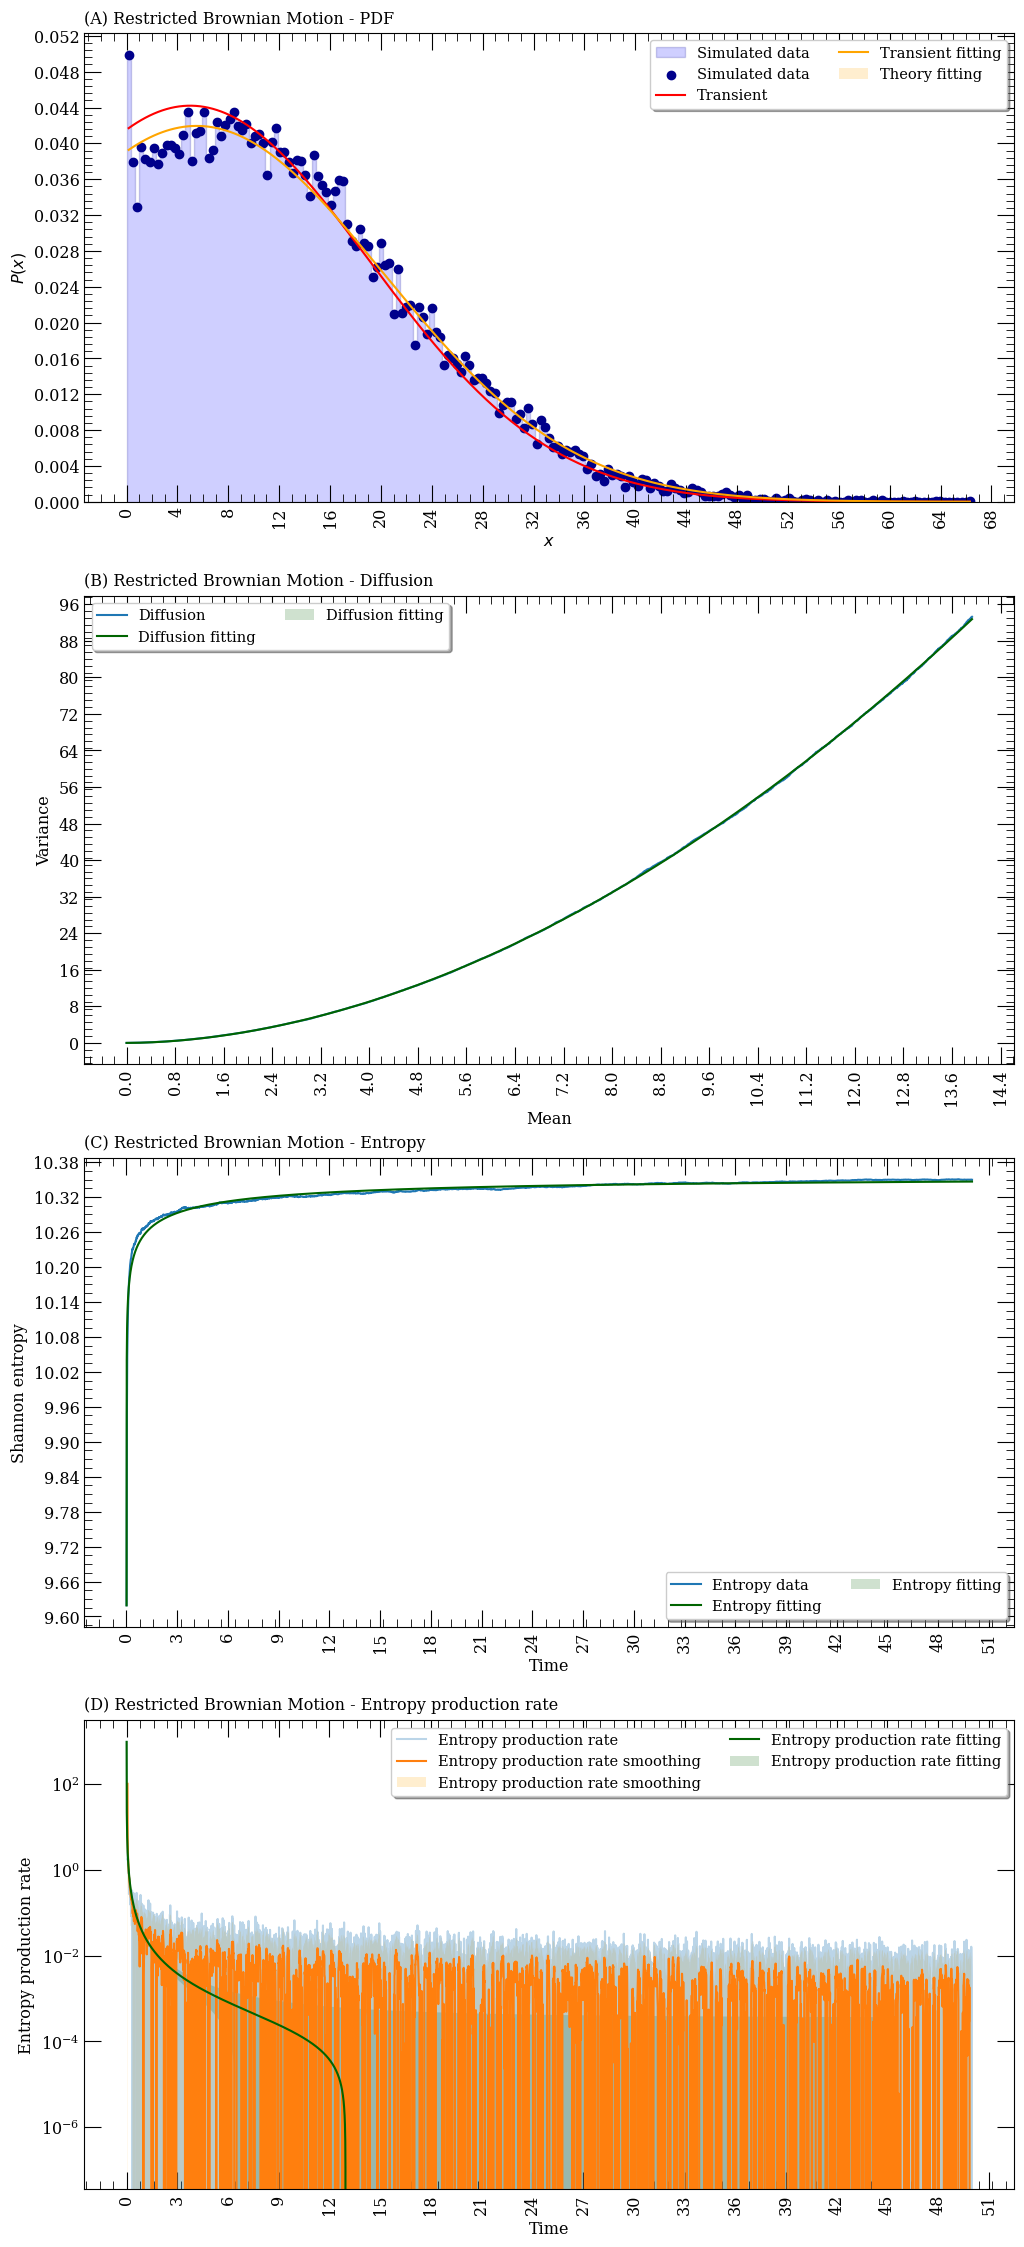

,fitting,params_name,params_value,params_lower,params_upper,r_squared,p_norm,mae_p
0,Transient state,time,5.250000e+01,-2.696020e+07,2.696030e+07,99.082,1,0.000905
1,Transient state,mu,1.050000e-01,-5.053757e+04,5.053778e+04,99.082,1,0.000905
2,Transient state,sigma,2.032064e+00,-5.175874e+05,5.175915e+05,99.082,1,0.000905
3,Transient state,x0,1.000000e-06,-6.567189e+05,6.567189e+05,99.082,1,0.000905
4,Transient state,t0,-1.000000e-06,-6.406812e+05,6.406812e+05,99.082,1,0.000905
5,Transient state,threshold,9.999907e-07,-2.255174e-01,2.255194e-01,99.082,1,0.000905
0,Diffusion law,coefficient,6.788470e-01,6.784627e-01,6.792312e-01,99.997,1,0.114594
1,Diffusion law,exponent,1.866705e+00,1.866475e+00,1.866936e+00,99.997,1,0.114594
0,Entropy,mu,-9.766989e-01,-1.122463e+03,1.120510e+03,96.024,1,0.003066
1,Entropy,sigma,1.569565e+00,-1.800771e+03,1.803910e+03,96.024,1,0.003066


In [12]:
edasp.plot_brownian_motion(
    df_bm = df_rbm,
    mu = mu_bm,
    sigma = sigma_bm,
    x0 = x0_bm,
    t0 = t0_bm,
    threshold = threshold_bm,
    n_steps = n_steps_bm,
    bins = int(np.sqrt(n_samples_bm))+1,
    density = True,
    alpha = 0.05,
    beta = -6,
    p = 1,
    ma_window = 10,
    p_norm = 1,
    significant_figures = 3,
    width = 12,
    height = 28,
    fontsize_labels = 11.5,
    fontsize_legend = 10.5,
    n_cols = 2,
    n_x_breaks = 20,
    n_y_breaks = 15,
    fancy_legend = True,
    usetex = False,
    dpi = 200,
    save_figures = False,
    output_path = output_path,
    information_name = "bm",
    input_generation_date = input_generation_date
)

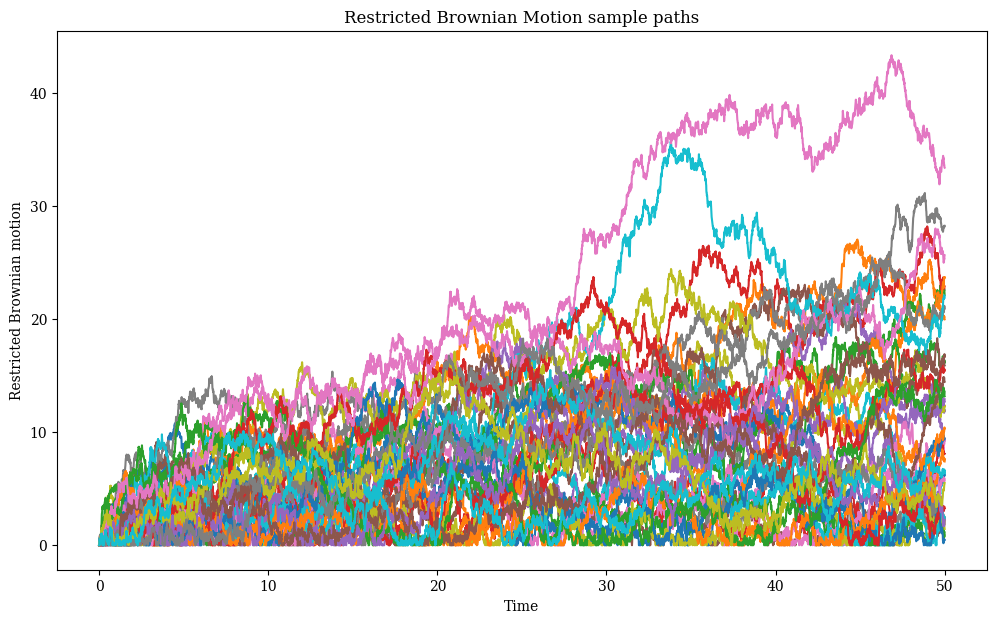

In [13]:
# Absolute Brownian motion samples ----
fig_2, ax_2 = plt.subplots(1, 1, figsize = (12, 7))

for path in range(0, 40):
    df_aux = df_rbm[df_rbm["simulation"] == path]
    ax_2.plot(
        df_aux["time"],
        df_aux["value"],
        alpha = 1,
        zorder = 2,
        marker = "",
        linestyle = "-",
        markersize = 1
    )
ax_2.set_title("Restricted Brownian Motion sample paths")
ax_2.set_xlabel("Time")
ax_2.set_ylabel("Restricted Brownian motion")
plt.show()

# Proofs

In [14]:
def plot_pdf(df, t, alpha, beta, mu, sigma, x0, t0, threshold, geometric_flag, type=1):
    df_aux = df
    t_max = df_aux["time"].max()
    df_aux = df_aux[df_aux["time"] == t]
    df_aux["value"].value_counts(dropna = False).reset_index().sort_values(["value"])
    v_min, v_max = df_aux["value"].min(), df_aux["value"].max()

    fig, ax = plt.subplots(1, 1)
    fig.set_size_inches(w = 14, h = 5)

    # Histogram of simulated data plot
    ax.hist(
        df_aux["value"],
        bins = 400,
        alpha = 0.19,
        facecolor = "blue",
        edgecolor = "darkblue",
        density = True,
        histtype = "stepfilled",
        cumulative = False,
        label = "Simulated data"
    )

    x = np.linspace(v_min, v_max, 200)
    if type == 1:
        y = esp.estimate_pdf_rbm(
            x = x,
            t = t,
            mu = mu,
            sigma = sigma,
            x0 = x0,
            t0 = t0,
            x_threshold = threshold,
            geometric_flag = geometric_flag
        )
    else:
        y = esp.estimate_pdf_rlf(
            x = x,
            t = t,
            alpha = alpha,
            beta = beta,
            mu = mu,
            sigma = sigma,
            x0 = x0,
            t0 = t0,
            x_threshold = threshold,
            geometric_flag = geometric_flag
        )

    ax.plot(x, y, color = "red", label = "Transient")

    ax.tick_params(which = "major", direction = "in", top = True, right = True, labelsize = 10, length = 12)
    ax.tick_params(which = "minor", direction = "in", top = True, right = True, labelsize = 10, length = 6)
    ax.xaxis.set_major_locator(mtick.MaxNLocator(10))
    ax.xaxis.set_minor_locator(mtick.MaxNLocator(4 * 10))
    ax.yaxis.set_major_locator(mtick.MaxNLocator(10))
    ax.yaxis.set_minor_locator(mtick.MaxNLocator(5 * 10))
    #ax.set_yscale(value = "log")

    plt.plot()

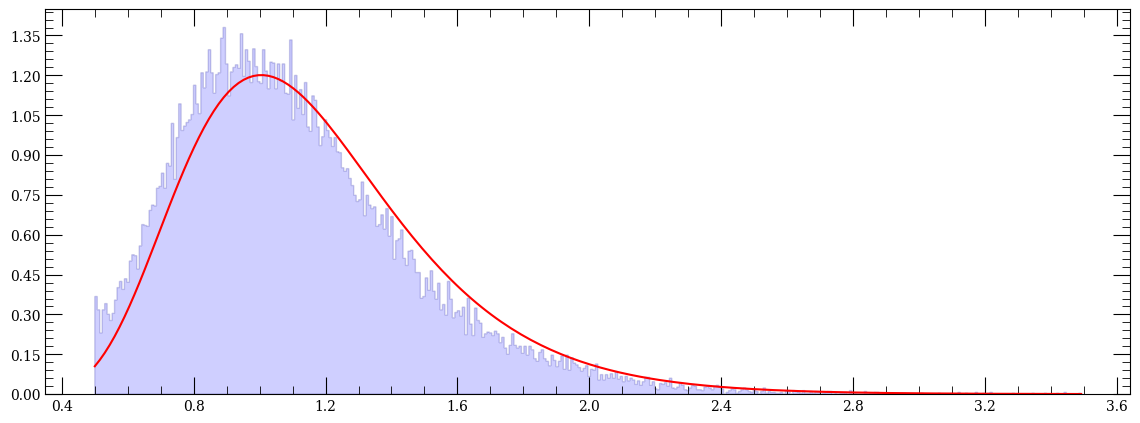

In [15]:
plot_pdf(
    df = df_rgbm,
    t = 10,
    alpha = 0,
    beta = 0,
    mu = mu_gbm,
    sigma = sigma_gbm,
    x0 = x0_gbm,
    t0 = t0_gbm,
    threshold = threshold_gbm,
    geometric_flag = True,
    type = 1
)

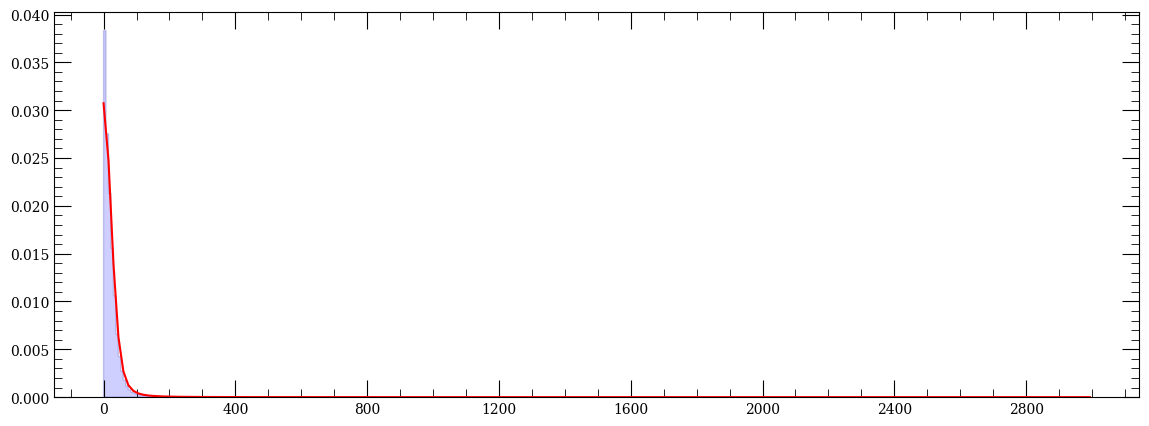

In [20]:
plot_pdf(
    df = df_rlf,
    t = 40,
    alpha = alpha_lf,
    beta = beta_lf,
    mu = mu_lf,
    sigma = sigma_lf,
    x0 = x0_lf,
    t0 = t0_lf,
    threshold = threshold_lf,
    geometric_flag = False,
    type = 2
)

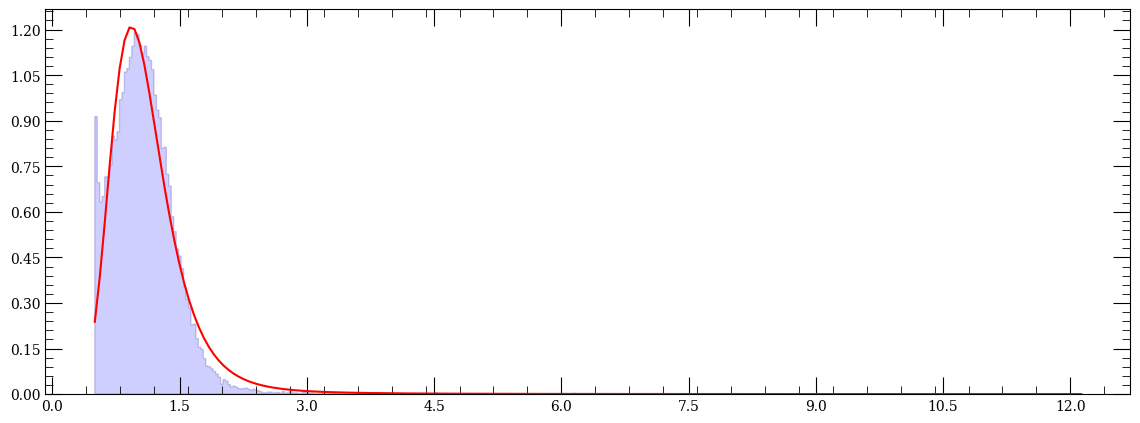

In [26]:
plot_pdf(
    df = df_rglf,
    t = 5,
    alpha = alpha_glf,
    beta = beta_glf,
    mu = mu_glf,
    sigma = sigma_glf,
    x0 = x0_glf,
    t0 = t0_glf,
    threshold = threshold_glf,
    geometric_flag = True,
    type = 2
)

